<a href="https://colab.research.google.com/github/rooteom0427/colab/blob/main/%5BBizdev%5D_2022%EB%85%84_%EC%9D%B4%ED%9B%84_%EA%B0%80%EC%9E%85%ED%95%9C_%EA%B3%A0%EC%88%98_%EC%A4%91%2C_%EA%B2%AC%EC%A0%81%EB%B0%9C%EC%86%A1_%EA%B2%BD%ED%97%98%EC%9D%B4_%EC%9E%88%EB%8A%94_%EA%B3%A0%EC%88%98%EC%9D%98_%EC%B2%AB_%EA%B2%AC%EC%A0%81_%EB%A6%AC%EB%93%9C%ED%83%80%EC%9E%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import io
import pandas as pd

uploaded = files.upload()

Saving bquxjob_73e2c245_18ba27c820f.csv to bquxjob_73e2c245_18ba27c820f (1).csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['bquxjob_73e2c245_18ba27c820f.csv']))

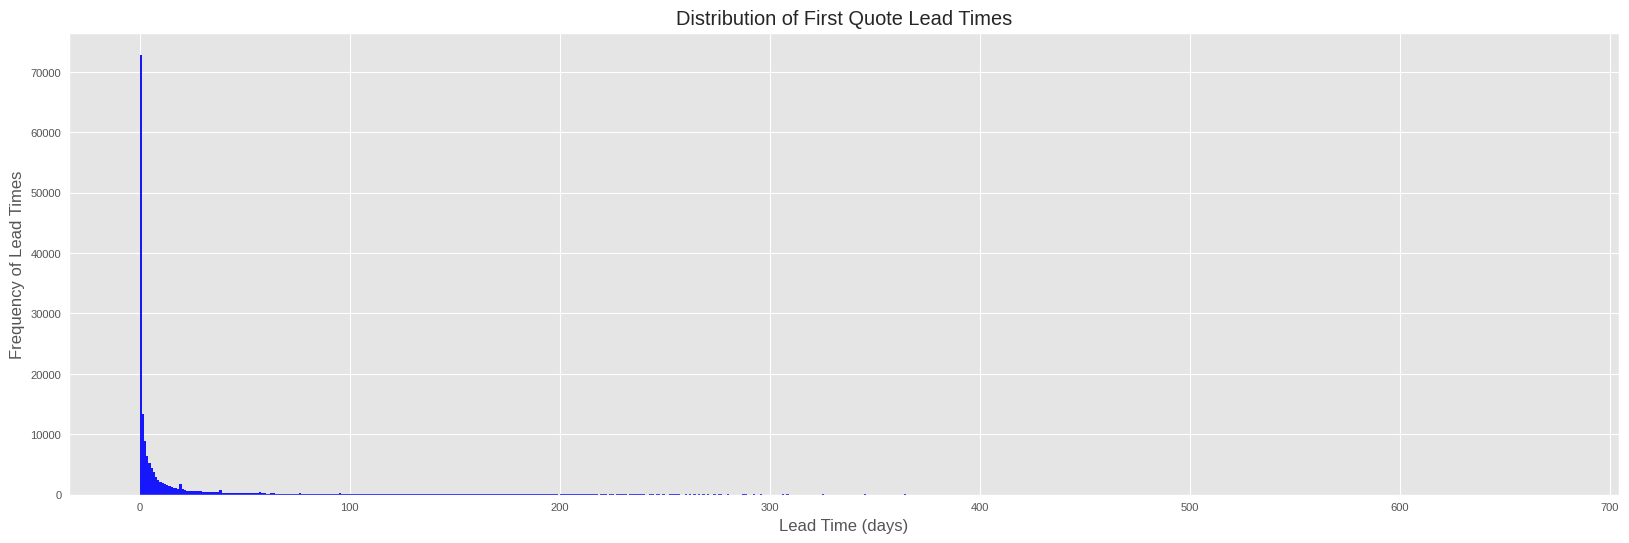

In [ ]:
import matplotlib.pyplot as plt

# Set the style
plt.style.use('ggplot')

# Plotting the histogram for fq_leadtime
plt.figure(figsize=(20, 6))
plt.hist(df['fq_leadtime'], bins=636, alpha=0.9, color='blue')

# Adding titles and labels
plt.title('Distribution of First Quote Lead Times')
plt.xlabel('Lead Time (days)')
plt.ylabel('Frequency of Lead Times')

# Show the plot
plt.grid(True)
plt.show()


In [ ]:
leadtime_80th_percentile = df['fq_leadtime'].quantile(0.8)
leadtime_80th_percentile

20.0

In [ ]:
leadtime_90th_percentile = df['fq_leadtime'].quantile(0.9)
leadtime_90th_percentile

67.0

In [ ]:
# Filter the data to include only the lead times up to the 80th percentile
filtered_data = df[df['fq_leadtime'] <= leadtime_80th_percentile]

# Calculate the mean and median of the filtered data
mean_leadtime = filtered_data['fq_leadtime'].mean()
median_leadtime = filtered_data['fq_leadtime'].median()

mean_leadtime, median_leadtime


(3.296257473979479, 1.0)

In [ ]:
# Filter the data to include only the lead times up to the 80th percentile
filtered_data = df[df['fq_leadtime'] <= leadtime_90th_percentile]

# Calculate the mean and median of the filtered data
mean_leadtime = filtered_data['fq_leadtime'].mean()
median_leadtime = filtered_data['fq_leadtime'].median()

mean_leadtime, median_leadtime


(7.124096607185094, 2.0)

In [ ]:
overall_mean_leadtime = df['fq_leadtime'].mean()
overall_median_leadtime = df['fq_leadtime'].median()

overall_mean_leadtime, overall_median_leadtime


(25.05922637544763, 2.0)

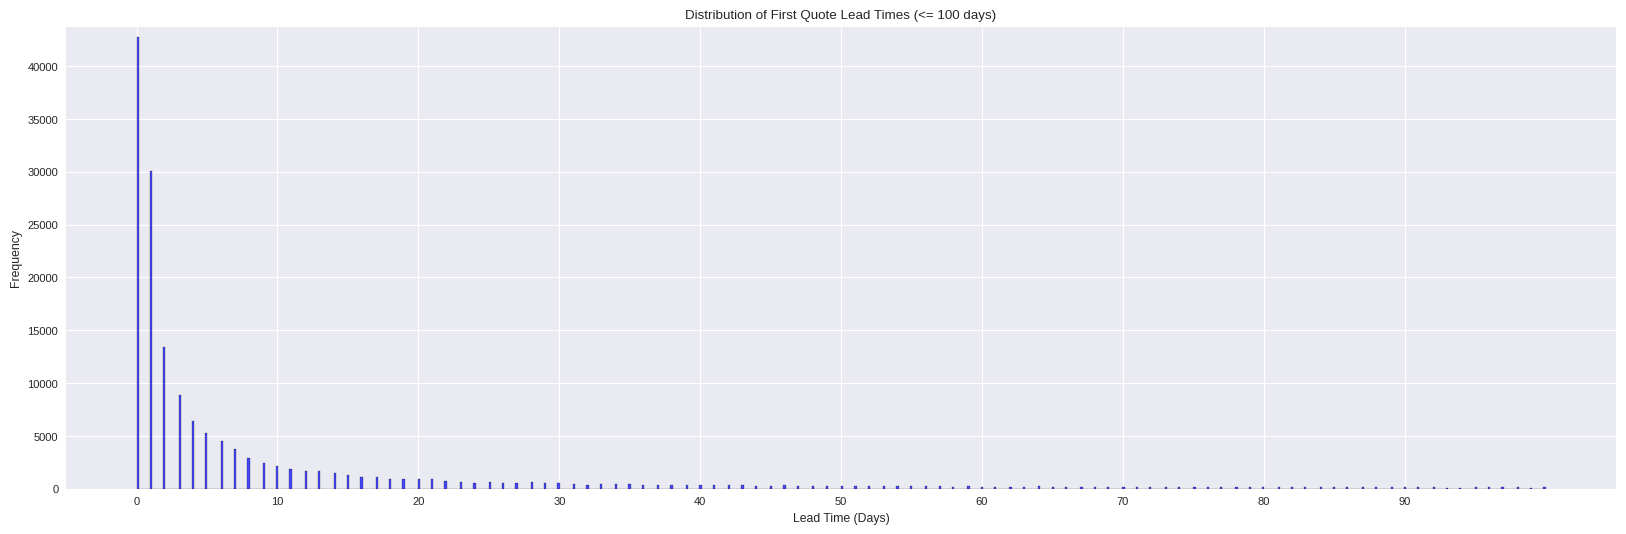

In [ ]:
filtered_data_under_100 = df[df['fq_leadtime'] <= 100 ]
distinct_cnt = df['fq_leadtime'].nunique()

# Plotting the histogram for the filtered data (lead times <= 100 days)
plt.figure(figsize=(20, 6))
plt.hist(filtered_data_under_100['fq_leadtime'], bins=distinct_cnt, alpha=0.7, color='blue', edgecolor='black')

# Adding titles and labels
plt.title('Distribution of First Quote Lead Times (<= 100 days)')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Frequency')

# Adjust y-axis to show the actual number of providers
plt.ylim(0, filtered_data_under_100['fq_leadtime'].value_counts().max() + 1000)  # Adding 1000 for a little extra space

plt.xticks(range(0, 100, 10))

# Show the plot
plt.grid(True)
plt.show()


In [ ]:
min_leadtime = df['fq_leadtime'].min()
max_leadtime = df['fq_leadtime'].max()

min_leadtime, max_leadtime

(0, 671)

In [ ]:
distinct_cnt = df['fq_leadtime'].nunique()
distinct_cnt

636

In [ ]:
s = pd.Series(df['fq_leadtime'])
s.describe()

count    168945.000000
mean         25.059226
std          66.392485
min           0.000000
25%           0.000000
50%           2.000000
75%          13.000000
max         671.000000
Name: fq_leadtime, dtype: float64

In [ ]:
df.describe()

,provider_rowid,fq_leadtime
count,1.689450e+05,168945.000000
mean,1.158252e+06,25.059226
std,1.977447e+05,66.392485
min,8.410180e+05,0.000000
25%,9.825910e+05,0.000000
50%,1.143793e+06,2.000000
75%,1.324959e+06,13.000000
max,1.534277e+06,671.000000


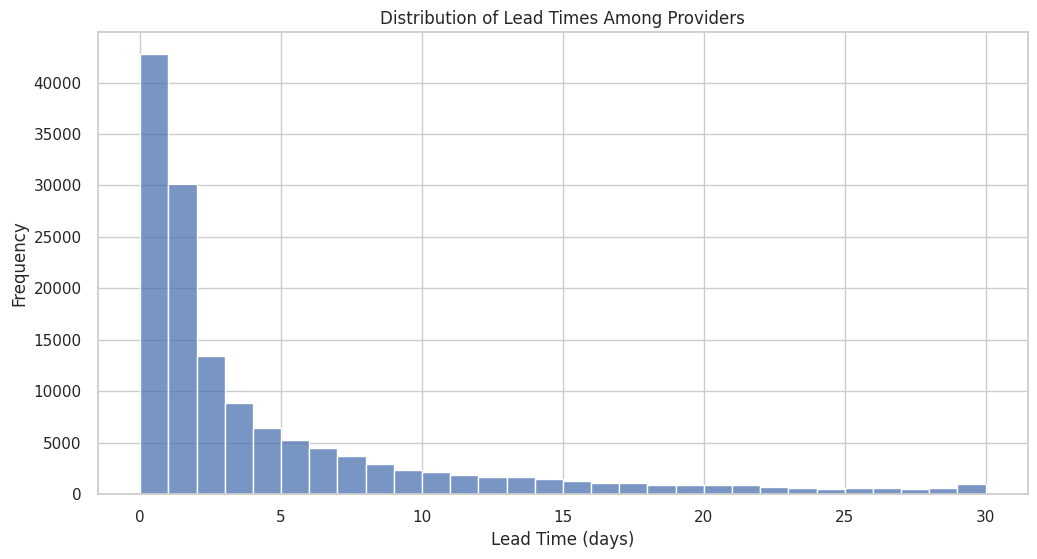

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# distinct_cnt = df['fq_leadtime'].nunique()

# Seaborn 스타일 설정
sns.set(style="whitegrid")

# 리드타임 분포 시각화를 위한 히스토그램
plt.figure(figsize=(12, 6))
sns.histplot(df[df['fq_leadtime']<=30]['fq_leadtime'], bins=30, kde=False)

# 그래프 제목과 축 라벨 설정
plt.title('Distribution of Lead Times Among Providers')
plt.xlabel('Lead Time (days)')
plt.ylabel('Frequency')

# 시각화 그래프 표시
plt.show()